In [235]:
import matplotlib.pyplot as plt
%matplotlib inline

In [257]:
class Pathogen:
    def __init__(self, num_pathogens=10000, num_infect=10, infect_rate=0.01, recover_rate=0.01, immunize_rate=0.015, num_timesteps=500):
        import numpy.random as nrand
        self.num_pathogens = num_pathogens
        self.num_infect = num_infect
        self.num_timesteps = num_timesteps
        self.infect_rate = infect_rate
        self.immunize_rate = immunize_rate
        self.recover_rate = recover_rate
        self.S, self.I, self.R, self.H = [], [], [], []
        
        self.population = np.tile('S', num_pathogens)
        self.initialInfect()
        self.timestep()

    def initialInfect(self):
        self.population[nrand.randint(0, self.num_pathogens, self.num_infect)] = 'I'

    def infect(self):
        uninfected = np.where(self.population == 'S')[0]
        infect_these = nrand.randint(0,1000,len(self.population[uninfected])) <= self.infect_rate*1000
        self.population[uninfected[infect_these]] = 'I'

    def immunize(self):
        uninfected = np.where(self.population == 'S')[0]
        immunize_these = nrand.randint(0,1000,len(self.population[uninfected])) <= self.immunize_rate*1000
        self.population[uninfected[immunize_these]] = 'R'

    def recover(self):
        infected = np.where(self.population == 'I')[0]
        recover_these = nrand.randint(0,1000,len(self.population[infected])) <= self.recover_rate*1000
        self.population[infected[recover_these]] = 'R'

    def timestep(self):
        for i in range(self.num_timesteps):
            self.S.append(len(self.population[self.population == 'S']))
            self.I.append(len(self.population[self.population == 'I']))
            self.R.append(len(self.population[self.population == 'R']))
            self.H.append(len(self.population[self.population == 'S']) + len(self.population[self.population == 'R']))
            self.immunize()
            self.infect()
            self.recover()
        return self.population

In [258]:
A = Pathogen()
B = Pathogen(10758, 21, 0.051, 0.930, 0.178)
C = Pathogen(18450, 12, 0.320, 0.969, 0.306)
D = Pathogen(9337, 15, 0.512, 0.513, 0.984)

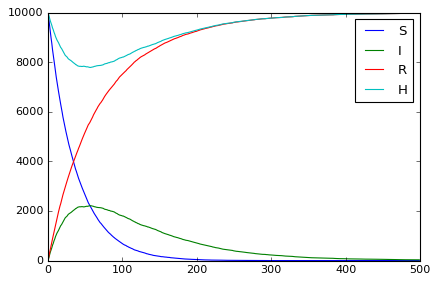

In [259]:
plt.plot(range(0,500),A.S,markersize=5,label='S')
plt.plot(range(0,500),A.I,markersize=5,label='I')
plt.plot(range(0,500),A.R,markersize=5,label='R')
plt.plot(range(0,500),A.H,markersize=5,label='H')
plt.legend()

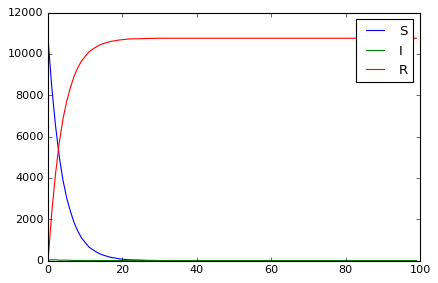

In [250]:
plt.plot(range(0,100),B.S[:100],markersize=5,label='S')
plt.plot(range(0,100),B.I[:100],markersize=5,label='I')
plt.plot(range(0,100),B.R[:100],markersize=5,label='R')
plt.legend()

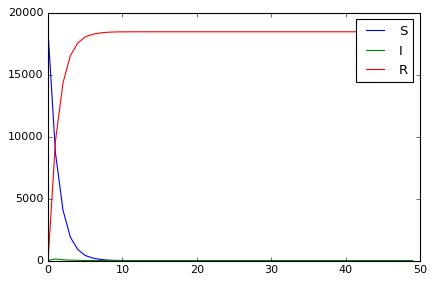

In [251]:
plt.plot(range(0,50),C.S[:50],markersize=5,label='S')
plt.plot(range(0,50),C.I[:50],markersize=5,label='I')
plt.plot(range(0,50),C.R[:50],markersize=5,label='R')
plt.legend()

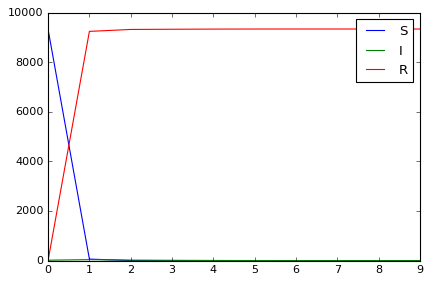

In [252]:
plt.plot(range(0,10),D.S[:10],markersize=5,label='S')
plt.plot(range(0,10),D.I[:10],markersize=5,label='I')
plt.plot(range(0,10),D.R[:10],markersize=5,label='R')
plt.legend()